In [29]:
import numpy as np
class MCPN:
    def __init__(self,wts,thrshld):
        self.wts=wts
        self.thrshld=thrshld

    def activate(self,ip):
        return int(np.dot(ip,self.wts)>=self.thrshld)

neuran=MCPN(wts=np.array([0.5,0.5]),thrshld=0.2)
output=neuran.activate(np.array([0.3,0.4]))
print("OP:",output)

OP: 1


In [24]:
import numpy as np
def heb_lr(i,lr):
    ni=i.shape[1]
    wts=np.random.rand(ni)
    for p in i:
        wts+=lr*p*np.dot(wts,p)
    return wts
i=np.array([[1,0,1],[1,1,0],[1,0,0]])
lr=0.1
wts=heb_lr(i,lr)
print("final weights",wts)

final weights [0.39189752 0.34538645 0.76590534]


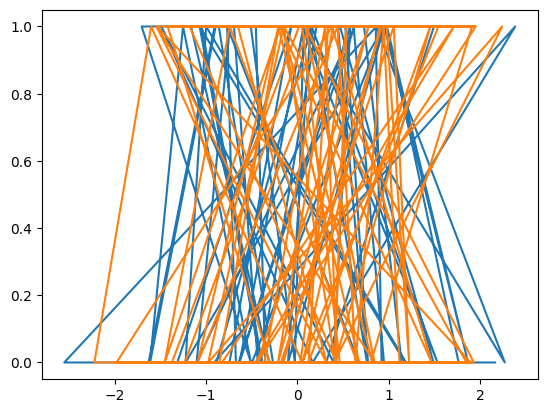

Accuracy: 0.56


In [17]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

np.random.seed(0)
x=np.random.randn(100,2)
y=np.random.randint(0,2,size=100)


model=LogisticRegression().fit(x,y)
accuracy=accuracy_score(y,model.predict(x))


print("Accuracy:",accuracy)

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
np.random.seed(0)
x=np.random.rand(100,2)
y=2*x[:,0]+3*x[:,1]+np.random.rand(100)
model=LinearRegression().fit(x,y)
mse=mean_squared_error(y,model.predict(x))
print("MSE:",mse)

MSE: 0.08950528524577223


In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression
np.random.seed(0)
x=2*np.random.rand(100,1)
y=4+3*x+np.random.rand(100,1)
model=LinearRegression().fit(x,y)
print("Intercept",model.intercept_)
print("Coefficient", model.coef_)

Intercept [4.55808002]
Coefficient [[2.96827553]]


In [12]:
import numpy as np
def pca(X,n_components):
    X_cent=X-np.mean(X,axis=0)
    eigval,eigvec=np.linalg.eigh(np.cov(X_cent,rowvar=False))
    idx=np.argsort(eigval)[::-1]
    return np.dot(X_cent,eigvec[:,idx[:n_components]])

np.random.seed(0)
X=np.random.rand(100,2)
X_pca=pca(X,1)
print("the original size", X.shape)
print("the transformed size", X_pca.shape)

the original size (100, 2)
the transformed size (100, 1)


In [18]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
x,y=make_classification(n_samples=100,n_features=2,n_redundant=0,n_classes=2,random_state=42)
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.3,random_state=42)
accuracy=accuracy_score(y_test,SVC(kernel='linear',C=1.0).fit(x_train,y_train).predict(x_test))
print("accuracy",accuracy)

accuracy 0.9857142857142858


In [21]:
import numpy as np
def hebbian_learning(input_data,learning_rate):
    num_input=input_data.shape[1]
    weights=np.random.randn(num_input)
    for pattern in input_data:
        weights+=learning_rate*pattern*np.dot(weights,pattern)
    return weights

input_data=np.array([[1,0,1],[1,1,0],[1,1,1]])
learning_rate=0.1
weights=hebbian_learning(input_data,learning_rate)
print('Final weights',weights)

Final weights [1.67020698 2.96072322 0.99554013]


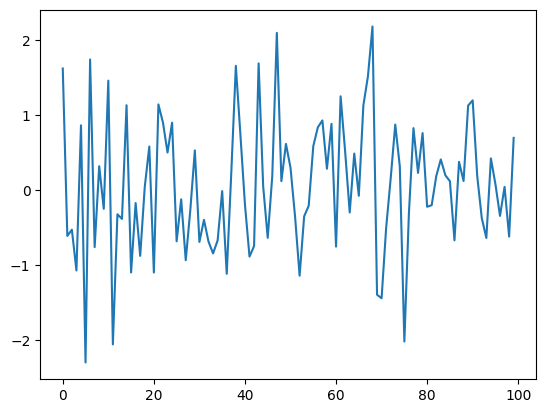

mean: 0.060582852075698704
S.D. 0.885156213831585


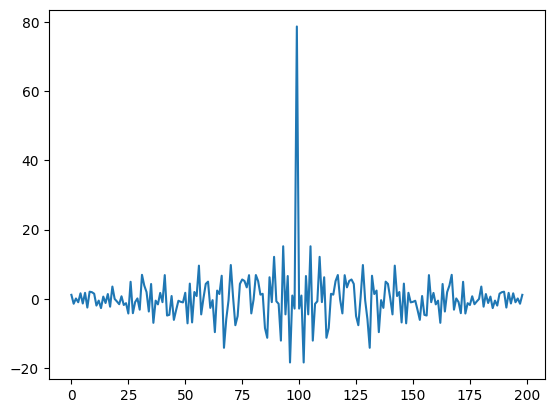

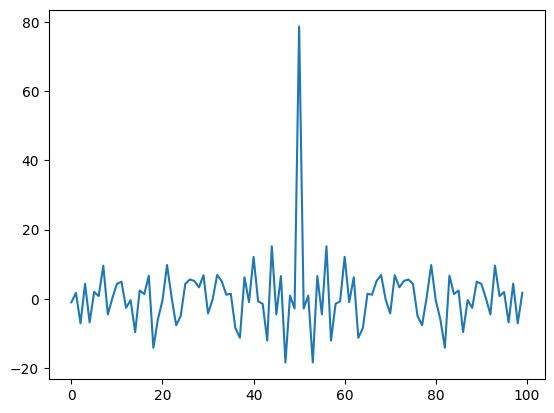

In [8]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
data=np.random.randn(100)
plt.plot(data)
plt.show()
mean=np.mean(data)
std=np.std(data)
print("mean:",mean)
print("S.D.",std)
acf=np.correlate(data,data,mode='full')
pacf=np.correlate(data,data,mode='same')
plt.plot(acf)
plt.show()
plt.plot(pacf)
plt.show()

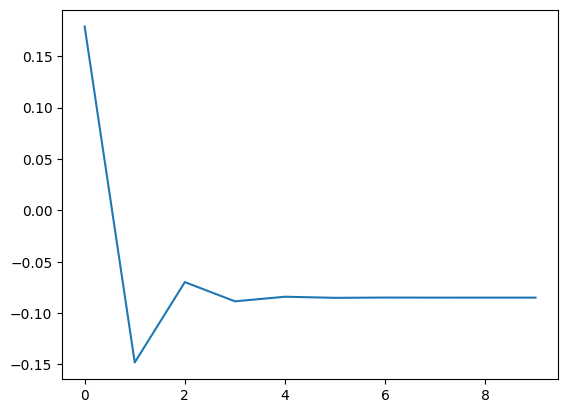

[ 0.17907904 -0.14817128 -0.06988846 -0.0886148  -0.0841352  -0.08520678
 -0.08495044 -0.08501176 -0.08499709 -0.0850006 ]


In [18]:
import numpy as np

from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


# Create a sample time series dataset
data = np.random.randn(100)

# Fit an ARIMA(1,1,1) model to the data
model = ARIMA(data, order=(1,1,1))
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=10)

plt.plot(predictions)
plt.show()

# Print the predictions
print(predictions)

MSE: 0.08950528524577223


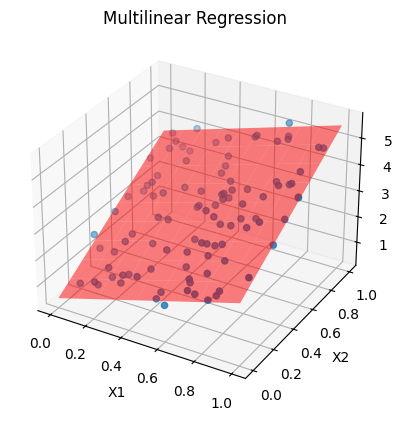

In [20]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate random data
np.random.seed(0)
x = np.random.rand(100, 2)
y = 2 * x[:, 0] + 3 * x[:, 1] + np.random.rand(100)

# Fit linear regression model
model = LinearRegression().fit(x, y)

# Calculate mean squared error
mse = mean_squared_error(y, model.predict(x))
print("MSE:", mse)

# Plot the data and regression plane
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:, 1], y)
# Create meshgrid for surface
x0, x1 = np.meshgrid(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
y_pred = model.predict(np.array([x0.flatten(), x1.flatten()]).T).reshape(x0.shape)
ax.plot_surface(x0, x1, y_pred, color='red', alpha=0.5)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('Multilinear Regression')
plt.show()


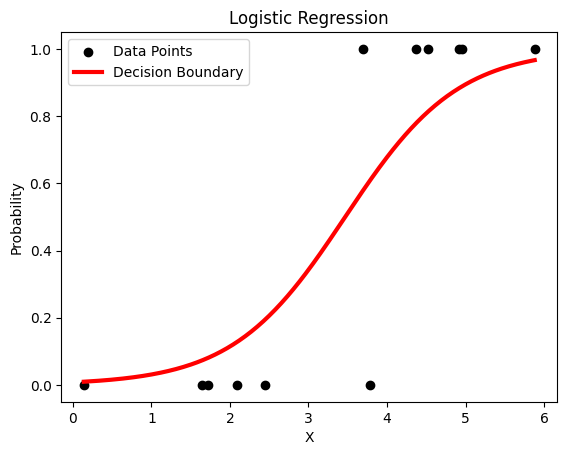

In [29]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

X = np.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

logr = LogisticRegression().fit(X, y)

# Plot data points
plt.scatter(X, y, color='black', label='Data Points')

# Plot decision boundary
X_test = np.linspace(np.min(X), np.max(X), 300).reshape(-1, 1)
probabilities_test = logr.predict_proba(X_test)[:, 1]
plt.plot(X_test, probabilities_test, color='red', linewidth=3, label='Decision Boundary')

# Labels and legend
plt.xlabel('X')
plt.ylabel('Probability')
plt.title('Logistic Regression')
plt.legend()

# Show plot
plt.show()

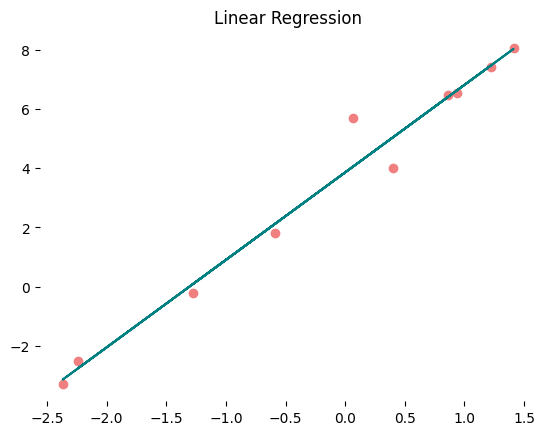

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = np.random.randn(10,1).reshape((-1,1))
y = 4+3*x+np.random.randn(10,1)

model = LinearRegression()

model.fit(x,y)

y_pred = model.predict(x)



plt.scatter(x, y, color = 'lightcoral')
plt.plot(x, y_pred, color='teal')
plt.title('Linear Regression')
plt.box(False)
plt.show()

MSE: 0.08950528524577223


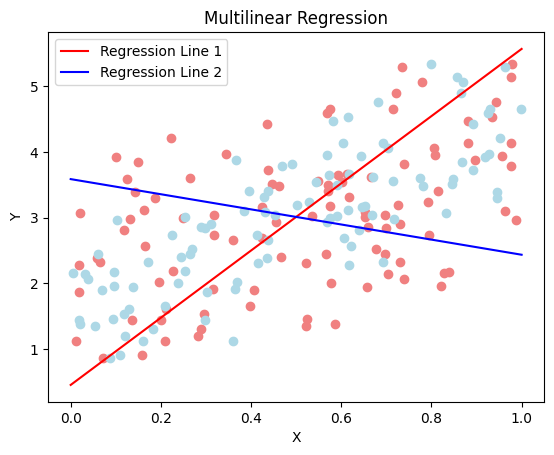

In [66]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Generate random data
np.random.seed(0)
x = np.random.rand(100, 2)
y = 2 * x[:, 0] + 3 * x[:, 1] + np.random.rand(100)

# Fit linear regression model
model = LinearRegression().fit(x, y)

# Calculate mean squared error
mse = mean_squared_error(y, model.predict(x))
print("MSE:", mse)

# Generate new data points lying on the lines
x_line_1 = np.array([[0, 0], [1, 1]])
x_line_2 = np.array([[0, 1], [1, 0]])
y_pred_line_1 = model.predict(x_line_1)
y_pred_line_2 = model.predict(x_line_2)

# Plot data points and regression lines
plt.scatter(x[:, 0], y, color='lightcoral')
plt.scatter(x[:, 1], y, color='lightblue')
plt.plot([0, 1], y_pred_line_1, color='red', label='Regression Line 1')
plt.plot([0, 1], y_pred_line_2, color='blue', label='Regression Line 2')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Multilinear Regression')
plt.legend()
plt.show()
